<a href="https://www.kaggle.com/code/caruazu/preprocessamento-de-dados-raiox?scriptVersionId=126174471" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Preprocessamento de exames de imagem

Preprocessamento de exames de raio-x, aplicando técnicas como nomalização de histogramas. O objetivo final é reduzir o ruído antes de possíveis aplicações de aprendizado de máquina

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL

In [2]:
# configurações de visualização
def mostre_raiox(raiox):
    plt.figure()
    plt.imshow(raiox)
    plt.show()

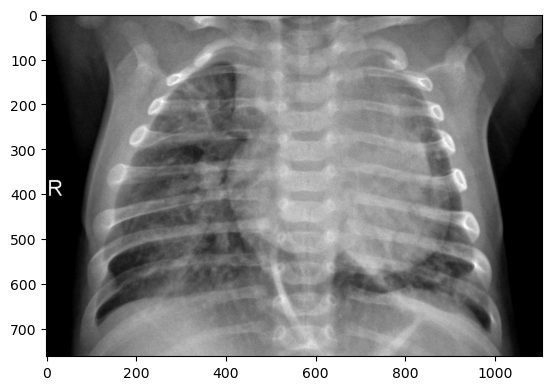

In [3]:
# exemplo de imagem
exemplo = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg')

mostre_raiox(exemplo)

In [4]:
def padronizador(endereco_img):    
    img = cv2.imread(endereco_img,0)
    
    # corte
    height, width = img.shape[:2]
    size = min(height, width)
    x = (width - size) // 2
    y = (height - size) // 2
    img_quadrada = img[y:y+size, x:x+size]

    # escala
    img_quadrada_pequena = cv2.resize(
        img_quadrada,
        (500, 500),
        interpolation = cv2.INTER_CUBIC
    )
    
    # equalização    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_quadrada_pequena_equalizada = clahe.apply(img_quadrada_pequena)
    
    return img_quadrada_pequena_equalizada

In [5]:
# quantas imagens temos?
imagems_treino_endereco = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/"

for nome_pasta in ['NORMAL','PNEUMONIA']:
    arquivos_lista = os.listdir(imagems_treino_endereco+nome_pasta)
    arquivos_num = len(arquivos_lista)
    print(nome_pasta+': '+str(arquivos_num))

NORMAL: 1341
PNEUMONIA: 3875


Para esse exemplo vou usar 100 imagens de treinos dessas duas pastas

In [6]:
pasta_pneumonia = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA'
pasta_normal = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL'

enderecos_selecionados = []
for endereco_pasta in [pasta_pneumonia,pasta_normal]:
    i = 0
    num_de_fotos_de_cada_pasta = 50
    for img_endereco in os.listdir(endereco_pasta):
        if i >= num_de_fotos_de_cada_pasta:
            break
        enderecos_selecionados.append(os.path.join(endereco_pasta, img_endereco))
        i += 1

Vamos então fazer o programa tratar nossas imagens

In [7]:
cwd = os.getcwd()
if not os.path.exists(os.path.join(cwd, "imagens_tratadas")):
    os.mkdir('/kaggle/working/imagens_tratadas')
    

for img_end in enderecos_selecionados:
    img_nome = os.path.basename(img_end)
    print('processando imagem '+img_nome)

    img_nova = padronizador(img_end)
    #mostre_raiox(img_nova)

    endereco_novo = "/kaggle/working/imagens_tratadas/"+"nova_"+img_nome
    cv2.imwrite(endereco_novo, img_nova)
    

processando imagem person1676_virus_2892.jpeg
processando imagem person1650_virus_2852.jpeg
processando imagem person22_virus_55.jpeg
processando imagem person122_bacteria_582.jpeg
processando imagem person85_bacteria_417.jpeg
processando imagem person79_virus_148.jpeg
processando imagem person29_virus_64.jpeg
processando imagem person123_bacteria_587.jpeg
processando imagem person75_virus_136.jpeg
processando imagem person153_bacteria_725.jpeg
processando imagem person173_bacteria_831.jpeg
processando imagem person16_virus_47.jpeg
processando imagem person138_bacteria_659.jpeg
processando imagem person112_bacteria_538.jpeg
processando imagem person83_bacteria_409.jpeg
processando imagem person23_virus_56.jpeg
processando imagem person80_bacteria_392.jpeg
processando imagem person140_bacteria_667.jpeg
processando imagem person3_virus_17.jpeg
processando imagem person97_bacteria_468.jpeg
processando imagem person1_virus_11.jpeg
processando imagem person83_bacteria_410.jpeg
processando i

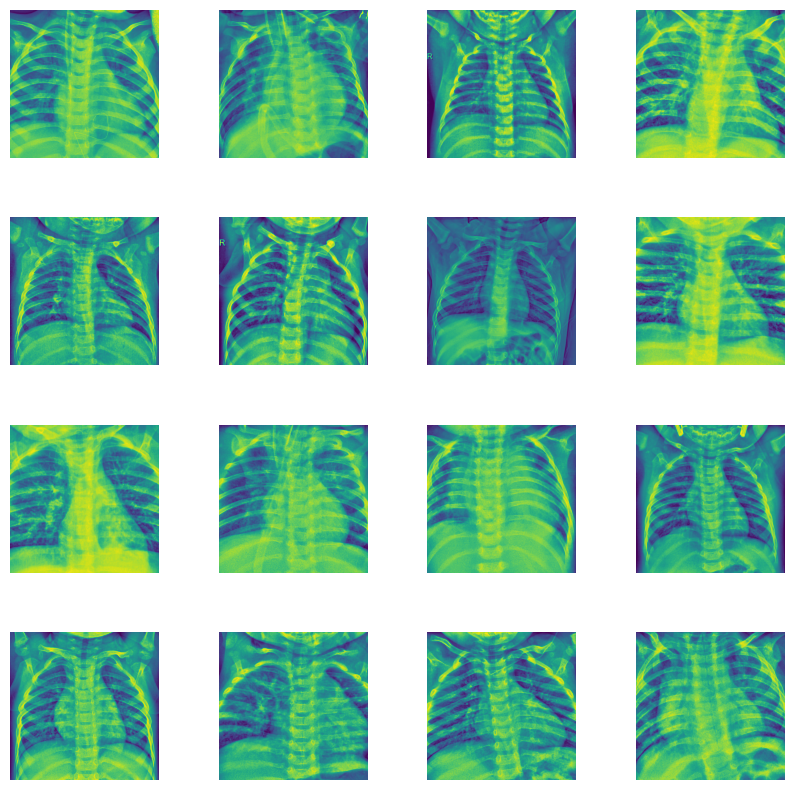

In [8]:
# vamos conferir o resultado
import random

# aleatoriamente seleciona 16 imagens novas
image_folder = '/kaggle/working/imagens_tratadas'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
random_images = random.sample(image_files, 16)

# cria o grafico abaixo 4x4
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    image = cv2.imread(image_file,0)
    axs[row, col].imshow(image)
    axs[row, col].axis('off')

plt.show()